# Normal 02a - Mercury in fish

# _Josep Fortiana_   &emsp;&emsp;&emsp;&emsp;&emsp;      2023-03-21

***
###### LaTeX macros
$\def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\expdist{\operatorname{Exp}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\invgammadist}{IG}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
***

# Case study:  Mercury concentration in fish 

## Data description

Mercury concentrations in parts per million (ppm) measured on tissue samples from  21 common carp specimens caught at a particular site. 

Data by courtesy of Kate Cowles, used in her book, _Applied Bayesian Statistics_ (2013), Chapters 6-8.

After log-transforming the data, the observed quantities are:

In [1]:
# Logs of concentration of mercury in fish tissue
x<-c(-2.526, -1.715, -1.427, -2.12, -2.659, -2.408, -3.219, -1.966,-2.526, -1.833,
    -2.813, -1.772, -2.813, -2.526, -3.219, -2.526,-2.813, -2.526, -3.507, -2.996, -3.912)

In [2]:
summary(x)
n<-length(x)
n

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -3.912  -2.813  -2.526  -2.563  -2.120  -1.427 

[1] 21

In [3]:
# Empirical mean and variance (the variance both with and without the correction factor)
xm<-mean(x)
s2tilde<-var(x)
s2<-sum((x-xm)^2)/n
round(c(xm,s2tilde,s2),4)

[1] -2.5630  0.3854  0.3670

# 01 - Statistics on the precision $\psi=1/\sigma^{2}$, assuming the mean is known

Assume, for the sake of the exercise, that the mean is known to be $\mu=-2.5$. 

Then, the variance must be computed with:

$$
	s^{2}(\mu)=\dfrac{1}{n}\dsum_{i=1}^{n}(x_{i}-\mu)^{2}.
$$

In [4]:
mu<--2.5
x0<-x-mu
s20<-sum(x0^2)/n
round(s20,4)
#[1] 0.371

[1] 0.371

## Conjugate prior

Our prior pdf for the precision is $\psi\sim\mbox{Gamma}(\alpha,\beta)$, where $\alpha$ and $\beta$ will be determined, if possible, from any prior information available.

## Computing prior $\alpha$ and $\beta$ from quantiles

Assume that an expert on mercury contamination told us:

>With $95\%$ certainty the (true) variance is between $q_{0.025}=0.25$ and $q_{0.975}=0.75$ (we assume the remaining 0.05 is symmetrically distributed both sides). 

That is,

$$
    0.95=P(q_{0.025}<\sigma^{2}<q_{0.975})=P(\frac{1}{q_{0.975}}<\psi<\frac{1}{q_{0.025}}).
$$

We recall that a $\mbox{Gamma}(\alpha,\beta)$ is a **scaled $\chi^{2}(k)$.**

Precisely, if $\psi\sim\gammadist(\alpha,\beta)$ then $Z\equiv 2\,\beta\,\psi\sim\chi^{2}(k)$, where $k\equiv 2\,\alpha$.

Multiplying the above inequalities by $2\,\beta$,

$$
    0.95=P\big(a\equiv 2\,\beta\cdot \frac{1}{q_{0.975}}<Z< b\equiv2\,\beta\cdot\frac{1}{q_{0.025}}\big).
$$

Since, for a given $k=2\,\alpha$, `a=qchisq(0.025,2*alpha)`  and `b=qchisq(0.975,2*alpha)`, and

$$
    \beta=\dfrac{a\cdot q_{0.975}}{2}=\dfrac{b\cdot q_{0.025}}{2},
$$

we can use this equality as an equation to determine $\alpha$. We want $\alpha$ such that both expressions coincide.

In [5]:
q025<-0.25
q975<-0.75
# diff.two.betas will be equal to zero when both expressions giving beta coincide:
diff.two.betas<-function(a,q025=0.25,q975=0.75){
    return(qchisq(0.025,2*a)*q975-qchisq(0.975,2*a)*q025)
    }
A<-uniroot(diff.two.betas,c(1,20))
prior.a<-A$root
#
prior.b<-qchisq(0.025,2*prior.a)*q975/2
round(prior.a,4)
round(prior.b,4)

[1] 13.2148

[1] 5.3087

We obtain $\alpha=13.2148$, $\beta=5.3087$ as prior parameters.

# A. Simulate with R

## Prior predictive pdf

In terms of:

$$
	t=\sqrt{\dfrac{(2\alpha+n-1)\,n\,s_{\mu}{}^{2}}{2\,\beta}}=\sqrt{\dfrac{k\,n\,s_{\mu}{}^{2}}{2\,\beta}},
$$

the prior predictive distribution is a Student's $t(k)$, with $k=2\,\alpha+n-1$ degrees of freedom.

In [6]:
k<-2*prior.a+n-1
round(k,4)
#[1] 46.4296

[1] 46.4296

## Simulated sample from the prior pdf

In [7]:
N<-20000
# N samples from the prior pdf of the precision parameter
Sim.psi<-rgamma(N,prior.a,prior.b)

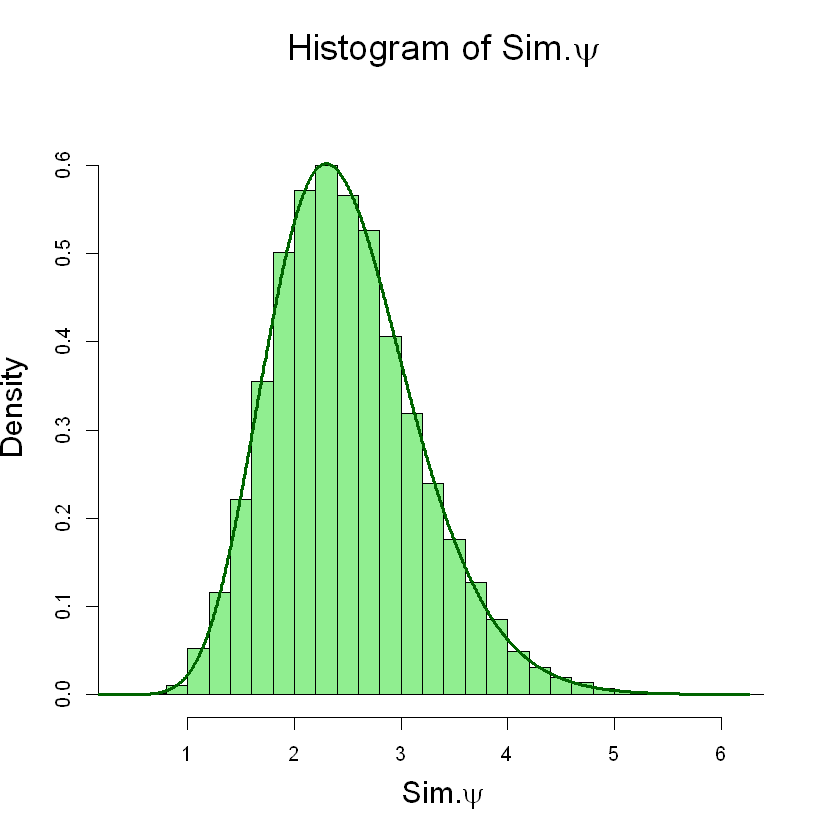

In [8]:
# Plot histogram, compare with the theoretical Gamma pdf 
options(repr.plot.width=7,repr.plot.height=7)
hist(Sim.psi,freq=FALSE,col="LightGreen",ylim=c(0,0.65),
     xlab=expression(paste("Sim.",psi)),
     main=expression(paste("Histogram of Sim.",psi)),breaks=25,cex.lab=1.5,cex.main=1.8)
v<-seq(0,max(Sim.psi),length=1000)
lines(v,dgamma(v,shape=prior.a,rate=prior.b),lwd=3.0,col="DarkGreen")

In [9]:
round(mean(Sim.psi),3)
round(mean(1/Sim.psi),3)
round(mean(sqrt(1/Sim.psi)),3)

[1] 2.49

[1] 0.435

[1] 0.653

In [10]:
mu<--2.5
#prior.a<-13.2148
#prior.b<-5.3087

## Simulated sample from the prior predictive pdf

In [11]:
# Generate N samples of x
# For each of the psi values generated above we generate an n-sample of normals with mean mu and sd=1/sqrt(psi)
Sim.x<-rnorm(N,mean=mu,sd=sqrt(1/Sim.psi)) 

In [12]:
# center the sample (to compare with the theoretical pdf)
Sim.x0<-Sim.x-mu
str(Sim.x0)

 num [1:20000] 0.641 0.967 -0.371 0.92 -1.72 ...


In [13]:
round(mean(Sim.x0),3)
round(var(Sim.x0),3)
round(sd(Sim.x0),3)

[1] 0.005

[1] 0.436

[1] 0.661

To convert from the $x$ scale to the $t$ variable we have a single $x$ observation, that is $n_{0}=1$ for each prior sample:

In [14]:
n.0<-1
k.0<-2*prior.a+n.0-1
# Formula above: t is a multiple of the centered x value. Proportionality coefficient:
c0<-sqrt(k.0*n.0/(2*prior.b))
round(c0,4)        
Sim.t<-c0*Sim.x0

[1] 1.5777

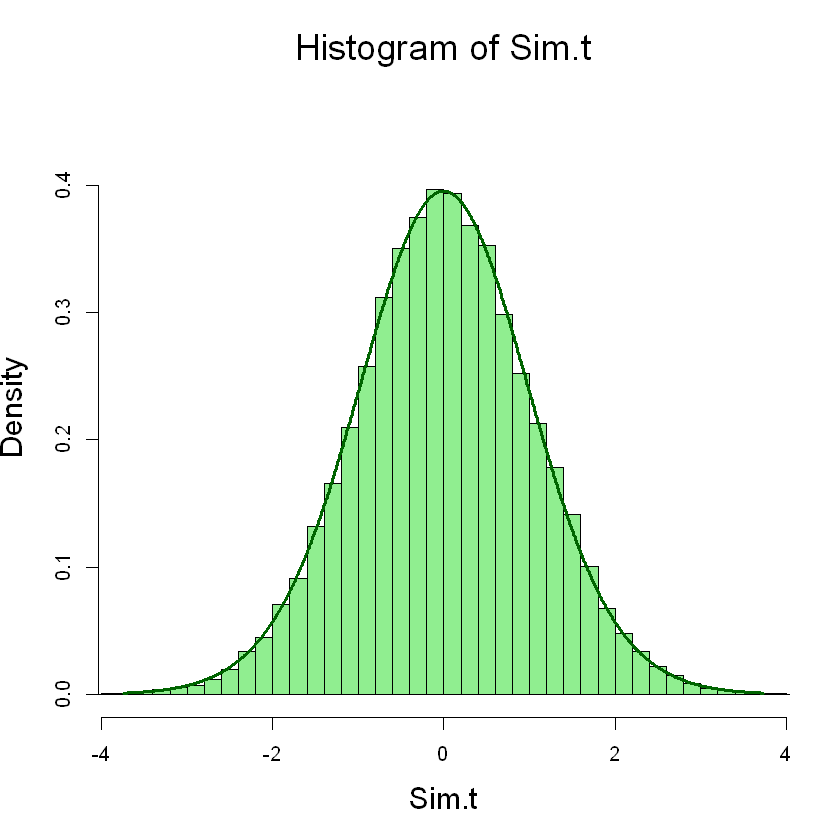

In [15]:
# Plot histogram, 
options(repr.plot.width=7,repr.plot.height=7)
tmax<-max(0.7*max(Sim.t),-0.7*min(Sim.t))
hist(Sim.t,freq=FALSE,col="LightGreen",xlim=c(-tmax,tmax),ylim=c(0,0.45),
     xlab=expression(paste("Sim.",t)),
     main=expression(paste("Histogram of Sim.",t)),
     nclass=40,cex.lab=1.5,cex.main=1.8)
u<-seq(-tmax,tmax,length=1000)
yu<-dt(u,df=k.0)
lines(u,yu,lwd=3.0,col="DarkGreen")

## Posterior pdf for $\psi$, given $x$

$$
    (\psi\CondTo x)\sim\gammadist(\tilde{\alpha},\tilde{\beta}), 
$$

where:

$$
    \left\{\begin{array}{lclclcr}
    \tilde{\alpha}  &=&\alpha+\dfrac{n}{2}      &=&13.2148+\dfrac{21}{2}           &=&23.7148,\\[0.2cm]
    \tilde{\beta}   &=&\beta+\dfrac{n\,s^{2}}{2}&=&5.3087+\dfrac{21\times0.3710}{2}&=&9.2041.
    \end{array}\right.
$$

In [16]:
n<-21
post.a<-prior.a+n/2
post.b<-prior.b+n*s20/2
round(post.a,4)
round(post.b,4)

[1] 23.7148

[1] 9.2041

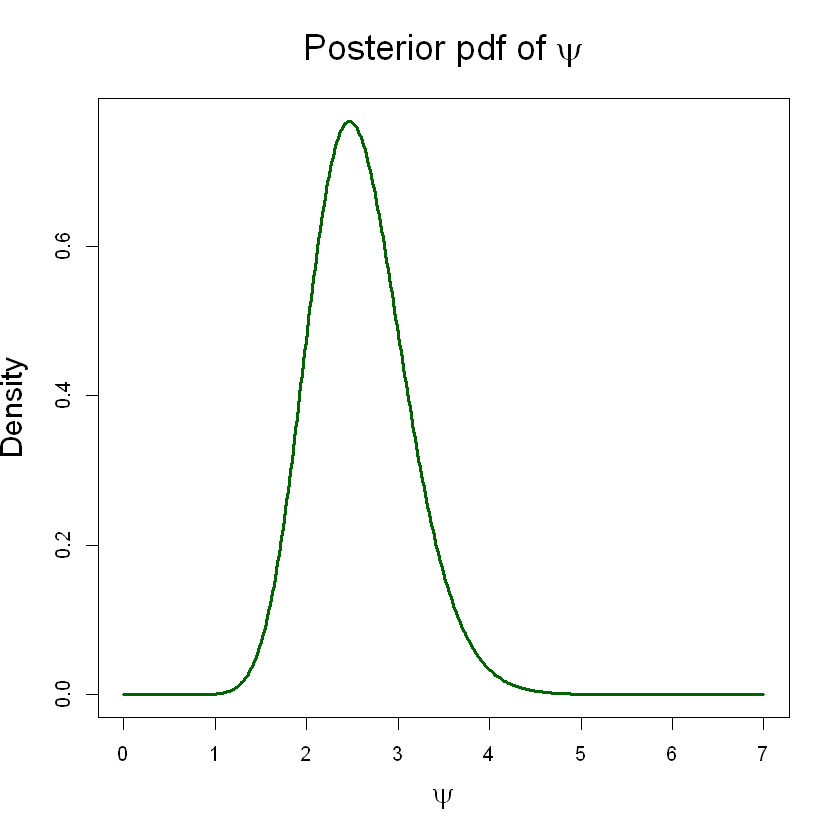

In [17]:
# posterior pdf
options(repr.plot.width=7,repr.plot.height=7)
pdf<-function(x){dgamma(x,shape=post.a,rate=post.b)}
u<-seq(0,7,length=500)
plot(u,pdf(u),"l",lwd=3.0,col="DarkGreen",xlab=expression(psi),ylab="Density",
     main=expression(paste("Posterior pdf of ",psi)),
     cex.lab=1.5,cex.main=1.8)

## MAP point estimator for $\psi$ and $\sigma^{2}$

Locating the mode of the posterior $(\psi\,|\,\mathbf{x})\sim
\gammadist(\tilde{\alpha},\tilde{\beta})$ pdf, we find it at:

$$
    \renewcommand{\arraystretch}{2.0}
    \begin{array}{lcl}
    \hat{\psi}_{MAP} &=&2.4679,\\
    {\hat{\sigma}^{2}}_{MAP}	&=&0.4052.
    \end{array}
$$

In [18]:
#options(repr.plot.width=7,repr.plot.height=7)
pdf<-function(x){dgamma(x,shape=post.a,rate=post.b)}
u<-seq(0,7,length=500)
#plot(u,pdf(u),"l",lwd=3.0,col="DarkGreen",xlab="",ylab="",main="Posterior pdf of psi")
MAP.psi<-u[which.max(pdf(u))]
round(MAP.psi,4)
# Find MAP for the variance sigma2
MAP.sigma2<-1/MAP.psi
round(MAP.sigma2,4)

[1] 2.4689

[1] 0.405

In [19]:
# Alternative computation
MAP.psi.1<-optimize(pdf,interval=c(0,7),maximum=TRUE)
round(MAP.psi.1$maximum,4)
#options(repr.plot.width=7,repr.plot.height=7)
#plot(u,pdf(u),"l",lwd=3.0,col="DarkGreen",xlab="",ylab="",main="Posterior pdf of psi")
#abline(v=MAP.psi.1$maximum,lwd=2,col="green")
MAP.sigma2.1<-1/MAP.psi.1$maximum
round(MAP.sigma2.1,4)

[1] 2.4679

[1] 0.4052

## Posterior 95% credible interval for the precision $\psi$ and for $\sigma^2=1/\psi$

With this posterior pdf, $(\psi\CondTo x)\sim\gammadist(\tilde{\alpha},\tilde{\beta})$ pdf,
we compute a posterior 95\% credible interval for $\psi$, and for $\sigma^{2}$, taking reciprocals.

In [20]:
a2<-qgamma(0.025,shape=post.a,rate=post.b)
b2<-qgamma(0.975,shape=post.a,rate=post.b)
I.post.95.psi<-c(a2,b2)
round(I.post.95.psi,4)
I.post.95.sigma2<-c(1/b2,1/a2)
round(I.post.95.sigma2,4)
#[1] 0.2694 0.6076

[1] 1.6459 3.7123

[1] 0.2694 0.6076